In [74]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import Matern

### GP without Truncation and with wrong likelihood

(1.0, 4.0)

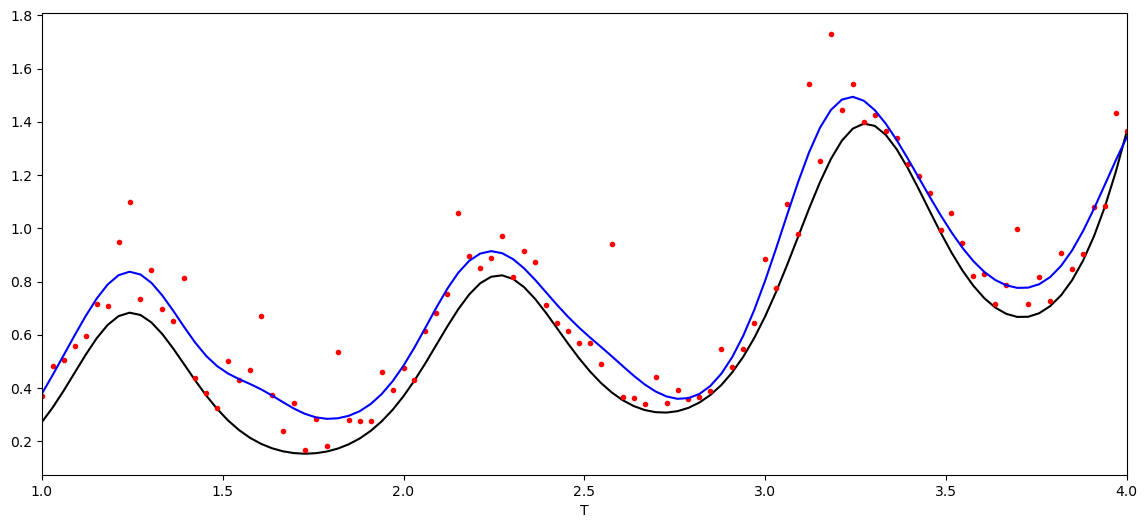

In [121]:
np.random.seed(0)
tmin, tmax = (1,4)
T = np.linspace(tmin, tmax, 100)
lamb = 8.

def f(t):
    return 1/(10*t) * np.exp(t + (1/np.sqrt(t)) * np.sin(2 * np.pi * t))

noise = np.random.exponential(scale = 1/lamb, size=len(T))
data = f(T) + noise

#sklearn GP
gp = GaussianProcessRegressor(kernel = Matern(length_scale=0.1, nu=5/2), alpha=1/lamb**2)
gp.fit(T.reshape(-1,1), data.reshape(-1,1))
sklearn_mean, sklearn_std = gp.predict(T.reshape(-1,1), return_std=True)


plt.figure(figsize=(14,6))
plt.plot(T, f(T), color='black', label='f(t)')
plt.plot(T, data, '.', color='red', label="data")
plt.plot(T, sklearn_mean, color='blue', label="sklearn")
plt.xlabel("T")
plt.xlim(tmin, tmax)